## Importing Necessary Libraries

In [292]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

from datetime import datetime
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier                              ## Binary Relavance
from sklearn.metrics import accuracy_score                                       # Performance metric
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn import svm


## Data Collection

In [293]:
book_data = pd.read_csv('DA-AI-ML-interview-assignment-Data.csv')
book_data

,Unnamed: 0,title,rating,name,num_ratings,num_reviews,num_followers,synopsis,genre
0,0,Sapiens: A Brief History of Humankind,4.39,Yuval Noah Harari,"8,06,229","46,149",30.5k,"100,000 years ago, at least six human species ...",history
1,1,"Guns, Germs, and Steel: The Fates of Human Soc...",4.04,Jared Diamond,"3,67,056","12,879","6,538","""Diamond has written a book of remarkable scop...",history
2,2,A People's History of the United States,4.07,Howard Zinn,"2,24,620","6,509","2,354","In the book, Zinn presented a different side o...",history
3,3,"The Devil in the White City: Murder, Magic, an...",3.99,Erik Larson,"6,13,157","36,644",64.2k,Author Erik Larson imbues the incredible event...,history
4,4,The Diary of a Young Girl,4.18,Anne Frank,"33,13,033","35,591","4,621",Discovered in the attic in which she spent the...,history
...,...,...,...,...,...,...,...,...,...
1534,1534,Hounded,4.09,Kevin Hearne,"83,827","7,203","11,905","Atticus O’Sullivan, last of the Druids, lives ...",fantasy
1535,1535,Charlie and the Chocolate Factory,4.15,Roald Dahl,"7,75,001","14,252","22,897",Charlie Bucket's wonderful adventure begins wh...,fantasy
1536,1536,Red Rising,4.25,Pierce Brown,"3,10,138","30,388","30,510","""I live for the dream that my children will be...",fantasy
1537,1537,Frostbite,4.26,Richelle Mead,"3,37,538","12,435","66,448","Rose loves Dimitri, Dimitri might love Tasha, ...",fantasy


## Data Understanding
    Initial Analysis

In [294]:
book_data.shape ## Here we can see the dataframe consists of 1539 rows and 9 columns

(1539, 9)

In [295]:
book_data.isna().sum() ## Here we have checked whether null values present in the data or not. As, you can see they are no null values in the data.

Unnamed: 0       0
title            0
rating           0
name             0
num_ratings      0
num_reviews      0
num_followers    0
synopsis         0
genre            0
dtype: int64

In [296]:
book2 = book_data.iloc[:,1:] ## Here by using iloc() function i removed the unwanted index column unnamed.
book2

,title,rating,name,num_ratings,num_reviews,num_followers,synopsis,genre
0,Sapiens: A Brief History of Humankind,4.39,Yuval Noah Harari,"8,06,229","46,149",30.5k,"100,000 years ago, at least six human species ...",history
1,"Guns, Germs, and Steel: The Fates of Human Soc...",4.04,Jared Diamond,"3,67,056","12,879","6,538","""Diamond has written a book of remarkable scop...",history
2,A People's History of the United States,4.07,Howard Zinn,"2,24,620","6,509","2,354","In the book, Zinn presented a different side o...",history
3,"The Devil in the White City: Murder, Magic, an...",3.99,Erik Larson,"6,13,157","36,644",64.2k,Author Erik Larson imbues the incredible event...,history
4,The Diary of a Young Girl,4.18,Anne Frank,"33,13,033","35,591","4,621",Discovered in the attic in which she spent the...,history
...,...,...,...,...,...,...,...,...
1534,Hounded,4.09,Kevin Hearne,"83,827","7,203","11,905","Atticus O’Sullivan, last of the Druids, lives ...",fantasy
1535,Charlie and the Chocolate Factory,4.15,Roald Dahl,"7,75,001","14,252","22,897",Charlie Bucket's wonderful adventure begins wh...,fantasy
1536,Red Rising,4.25,Pierce Brown,"3,10,138","30,388","30,510","""I live for the dream that my children will be...",fantasy
1537,Frostbite,4.26,Richelle Mead,"3,37,538","12,435","66,448","Rose loves Dimitri, Dimitri might love Tasha, ...",fantasy


In [297]:
book2.info() ## BY using the method you can know the entire information of the dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1539 non-null   object 
 1   rating         1539 non-null   float64
 2   name           1539 non-null   object 
 3   num_ratings    1539 non-null   object 
 4   num_reviews    1539 non-null   object 
 5   num_followers  1539 non-null   object 
 6   synopsis       1539 non-null   object 
 7   genre          1539 non-null   object 
dtypes: float64(1), object(7)
memory usage: 96.3+ KB


In [298]:
book2.describe() ## Shows the description of the data like mean, median values

,rating
count,1539.000000
mean,4.037518
std,0.225939
min,2.780000
25%,3.905000
50%,4.050000
75%,4.180000
max,4.750000


In [299]:
len(book2['title'].unique()) ## so here i have checked whether they are any unique book titles but we can see that all books are unique.

1539

In [300]:
len(book2['genre'].unique()) ## Here we can see that they are 10 unique genres of books 

10

In [301]:
book2['genre'].value_counts() ## no of books in each genre where the highest are thriller books.

thriller           481
fantasy            348
romance            111
horror             100
psychology          99
history             99
travel              98
sports              79
science             79
science_fiction     45
Name: genre, dtype: int64

In [302]:
book2.dtypes ## Here we can see that the datatype for num_ratings, num_reviews, num_followers should be in int. so lets convert them into int

title             object
rating           float64
name              object
num_ratings       object
num_reviews       object
num_followers     object
synopsis          object
genre             object
dtype: object

In [303]:
book2['num_followers']=book2['num_followers'].str.replace(',','')
book2['num_reviews']=book2['num_reviews'].str.replace(',','')       ## Here I have removed the commas in the data to convert into integer.
book2['num_ratings']=book2['num_ratings'].str.replace(',','')
book2

,title,rating,name,num_ratings,num_reviews,num_followers,synopsis,genre
0,Sapiens: A Brief History of Humankind,4.39,Yuval Noah Harari,806229,46149,30.5k,"100,000 years ago, at least six human species ...",history
1,"Guns, Germs, and Steel: The Fates of Human Soc...",4.04,Jared Diamond,367056,12879,6538,"""Diamond has written a book of remarkable scop...",history
2,A People's History of the United States,4.07,Howard Zinn,224620,6509,2354,"In the book, Zinn presented a different side o...",history
3,"The Devil in the White City: Murder, Magic, an...",3.99,Erik Larson,613157,36644,64.2k,Author Erik Larson imbues the incredible event...,history
4,The Diary of a Young Girl,4.18,Anne Frank,3313033,35591,4621,Discovered in the attic in which she spent the...,history
...,...,...,...,...,...,...,...,...
1534,Hounded,4.09,Kevin Hearne,83827,7203,11905,"Atticus O’Sullivan, last of the Druids, lives ...",fantasy
1535,Charlie and the Chocolate Factory,4.15,Roald Dahl,775001,14252,22897,Charlie Bucket's wonderful adventure begins wh...,fantasy
1536,Red Rising,4.25,Pierce Brown,310138,30388,30510,"""I live for the dream that my children will be...",fantasy
1537,Frostbite,4.26,Richelle Mead,337538,12435,66448,"Rose loves Dimitri, Dimitri might love Tasha, ...",fantasy


In [304]:
import warnings                            ## to ignore unnecessary warnings
warnings.filterwarnings(action="ignore")

In [305]:
def foll_clean(s):
    if s[-1] == 'k':                       ## Here created a funtion as we need to handle "k" which is 1000. we replaced substring with another substring. So, from object we converted it int.
        s = re.sub(r'[,a-zA-Z]', "", s)
        return int(float(s[:-1]) * 1000)
    else:
        s = re.sub(r'[,a-zA-Z]', "", s)
        return int(s)

In [306]:
book2['num_followers'] = book2['num_followers'].apply(foll_clean) ## above function been assigned by using apply() method.

In [307]:
book2.dtypes   

title             object
rating           float64
name              object
num_ratings       object
num_reviews       object
num_followers      int64
synopsis          object
genre             object
dtype: object

In [308]:
book2['num_ratings'] = pd.to_numeric(book2['num_ratings'])

In [309]:
book2['num_reviews'] = pd.to_numeric(book2['num_reviews'])

In [310]:
book2.dtypes ## So,here we can see that the datatypes of num_ratings, num_reviews. num_followers changed from object to integers.

title             object
rating           float64
name              object
num_ratings        int64
num_reviews        int64
num_followers      int64
synopsis          object
genre             object
dtype: object

In [311]:
book2                                           ## Now the data is ready for visualization and model building

,title,rating,name,num_ratings,num_reviews,num_followers,synopsis,genre
0,Sapiens: A Brief History of Humankind,4.39,Yuval Noah Harari,806229,46149,30000,"100,000 years ago, at least six human species ...",history
1,"Guns, Germs, and Steel: The Fates of Human Soc...",4.04,Jared Diamond,367056,12879,6538,"""Diamond has written a book of remarkable scop...",history
2,A People's History of the United States,4.07,Howard Zinn,224620,6509,2354,"In the book, Zinn presented a different side o...",history
3,"The Devil in the White City: Murder, Magic, an...",3.99,Erik Larson,613157,36644,64000,Author Erik Larson imbues the incredible event...,history
4,The Diary of a Young Girl,4.18,Anne Frank,3313033,35591,4621,Discovered in the attic in which she spent the...,history
...,...,...,...,...,...,...,...,...
1534,Hounded,4.09,Kevin Hearne,83827,7203,11905,"Atticus O’Sullivan, last of the Druids, lives ...",fantasy
1535,Charlie and the Chocolate Factory,4.15,Roald Dahl,775001,14252,22897,Charlie Bucket's wonderful adventure begins wh...,fantasy
1536,Red Rising,4.25,Pierce Brown,310138,30388,30510,"""I live for the dream that my children will be...",fantasy
1537,Frostbite,4.26,Richelle Mead,337538,12435,66448,"Rose loves Dimitri, Dimitri might love Tasha, ...",fantasy


## Data Visualization

Text(0, 0.5, 'Frequency')

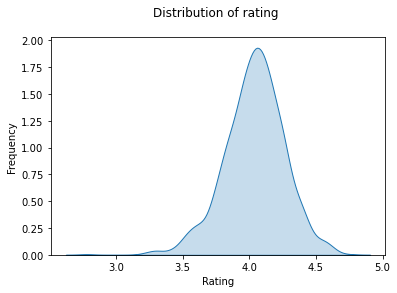

In [312]:
sns.kdeplot(book2['rating'], shade = True)
plt.title('Distribution of rating \n')         ## Here we distributed the ratings and we can see the range from 3.2 to 4.7 but the average rating is 4.0
plt.xlabel('Rating')
plt.ylabel('Frequency')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '3.94'),
  Text(1, 0, '3.95'),
  Text(2, 0, '3.97'),
  Text(3, 0, '3.98'),
  Text(4, 0, '3.99'),
  Text(5, 0, '4.0'),
  Text(6, 0, '4.01'),
  Text(7, 0, '4.02'),
  Text(8, 0, '4.03'),
  Text(9, 0, '4.04'),
  Text(10, 0, '4.05'),
  Text(11, 0, '4.06'),
  Text(12, 0, '4.08'),
  Text(13, 0, '4.09'),
  Text(14, 0, '4.11'),
  Text(15, 0, '4.12'),
  Text(16, 0, '4.13'),
  Text(17, 0, '4.14'),
  Text(18, 0, '4.15'),
  Text(19, 0, '4.16')])

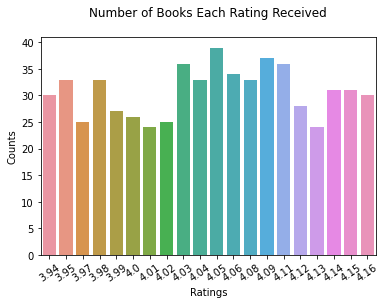

In [313]:
sns.barplot(book2['rating'].value_counts().head(20).index, book2['rating'].value_counts().head(20))
plt.title('Number of Books Each Rating Received\n')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.xticks(rotation=35) ## Number of books and their respective ratings shows in the plot

<AxesSubplot:xlabel='num_ratings', ylabel='title'>

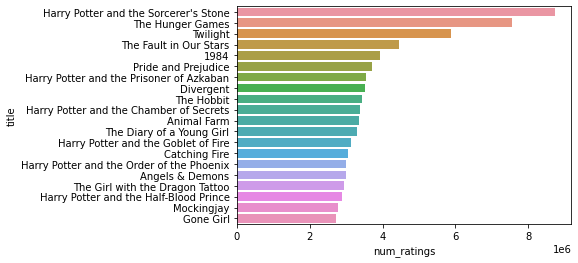

In [314]:
highrating_books = book2.nlargest(20, ['num_ratings']).set_index('title')['num_ratings']
sns.barplot(highrating_books, highrating_books.index) ## So, here we can see that the popular book is harry potter according to num_ratings

<AxesSubplot:xlabel='num_reviews', ylabel='title'>

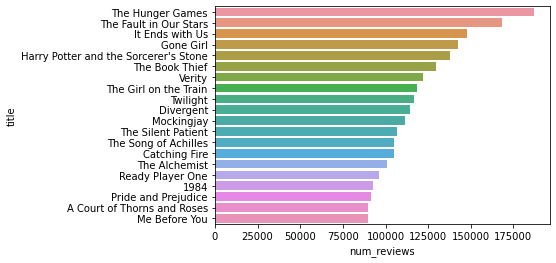

In [315]:
highrise_reviews = book2.nlargest(20, ['num_reviews']) ## So, here the high reviews got for hunger games.
sns.barplot(highrise_reviews['num_reviews'], highrise_reviews['title'])

<AxesSubplot:xlabel='num_followers', ylabel='title'>

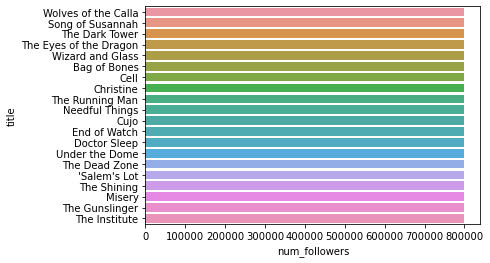

In [316]:
high_followers = book2.nlargest(20, ['num_followers'])   ## Here in this plot we can see the 20 books which has high followers. 
sns.barplot(high_followers['num_followers'], high_followers['title'])

Text(0.5, 0, 'Number of Publications')

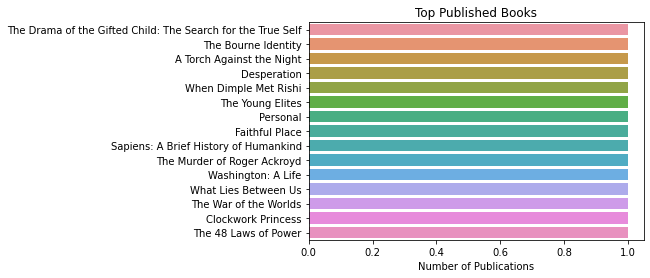

In [317]:
sns.barplot(book2['title'].value_counts()[:15], book2['title'].value_counts().index[:15])
plt.title('Top Published Books')
plt.xlabel('Number of Publications')  ## Here in this barplot you can see the 20 books which are top in publishing

## Customers who frequently read the books of particular author. High read books of Author

Text(0.5, 0, 'Total Ratings')

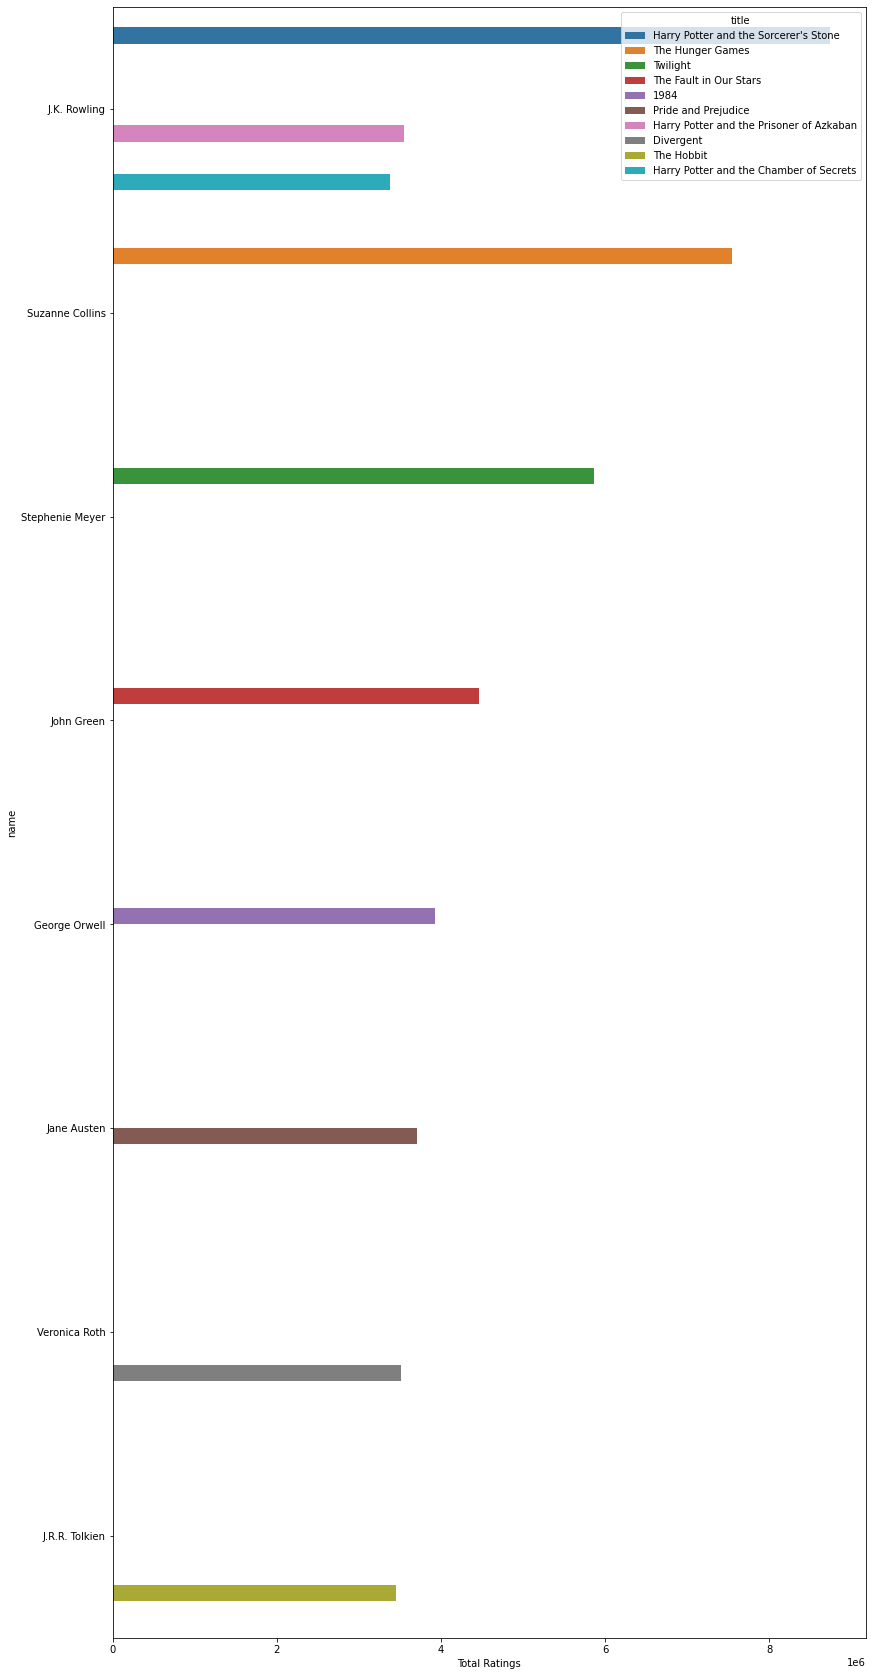

In [318]:
plt.figure(figsize=(13.5, 30))  
authors = book2.nlargest(10, ['num_ratings']).set_index('name')
sns.barplot(authors['num_ratings'], authors.index, ci = None, hue = authors['title'])
plt.xlabel('Total Ratings')

In [319]:
book2

,title,rating,name,num_ratings,num_reviews,num_followers,synopsis,genre
0,Sapiens: A Brief History of Humankind,4.39,Yuval Noah Harari,806229,46149,30000,"100,000 years ago, at least six human species ...",history
1,"Guns, Germs, and Steel: The Fates of Human Soc...",4.04,Jared Diamond,367056,12879,6538,"""Diamond has written a book of remarkable scop...",history
2,A People's History of the United States,4.07,Howard Zinn,224620,6509,2354,"In the book, Zinn presented a different side o...",history
3,"The Devil in the White City: Murder, Magic, an...",3.99,Erik Larson,613157,36644,64000,Author Erik Larson imbues the incredible event...,history
4,The Diary of a Young Girl,4.18,Anne Frank,3313033,35591,4621,Discovered in the attic in which she spent the...,history
...,...,...,...,...,...,...,...,...
1534,Hounded,4.09,Kevin Hearne,83827,7203,11905,"Atticus O’Sullivan, last of the Druids, lives ...",fantasy
1535,Charlie and the Chocolate Factory,4.15,Roald Dahl,775001,14252,22897,Charlie Bucket's wonderful adventure begins wh...,fantasy
1536,Red Rising,4.25,Pierce Brown,310138,30388,30510,"""I live for the dream that my children will be...",fantasy
1537,Frostbite,4.26,Richelle Mead,337538,12435,66448,"Rose loves Dimitri, Dimitri might love Tasha, ...",fantasy


## Genre Prediction using Synopsis

In [320]:
book2.groupby('genre').count() ## Here we have grouped all rows of genre.

,title,rating,name,num_ratings,num_reviews,num_followers,synopsis
genre,,,,,,,
fantasy,348,348,348,348,348,348,348
history,99,99,99,99,99,99,99
horror,100,100,100,100,100,100,100
psychology,99,99,99,99,99,99,99
romance,111,111,111,111,111,111,111
science,79,79,79,79,79,79,79
science_fiction,45,45,45,45,45,45,45
sports,79,79,79,79,79,79,79
thriller,481,481,481,481,481,481,481


In [321]:
book2['synopsis']

0       100,000 years ago, at least six human species ...
1       "Diamond has written a book of remarkable scop...
2       In the book, Zinn presented a different side o...
3       Author Erik Larson imbues the incredible event...
4       Discovered in the attic in which she spent the...
                              ...                        
1534    Atticus O’Sullivan, last of the Druids, lives ...
1535    Charlie Bucket's wonderful adventure begins wh...
1536    "I live for the dream that my children will be...
1537    Rose loves Dimitri, Dimitri might love Tasha, ...
1538    The Prince of no value\nBrishen Khaskem, princ...
Name: synopsis, Length: 1539, dtype: object

## Data Preprocessing 
In which includes cleaning of the synopsis column and ready for prediction. 
1.First filtered an dremoved everything else and converting into lowercase letters
2.backslash, alphabets, to remove whitespaces andconverting the text into lower cases. 
3.Performed stopwords removal like the, he, her, etc. we can see all the stopwords available in english. 
4.Lemmetization is performed 
5.stemming is performed 

## Filtering out the synopsis

In [322]:
def clean(text): ## created funstion which can clean the text
    # Inorder to remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # Inorder to remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # Inorder to remove whitespaces 
    text = ' '.join(text.split()) 
    # converting text to lowercase 
    text = text.lower() 
    
    return text

book2.loc[:,'synopsis']=book2.loc[:,'synopsis'].apply(lambda x: clean(x))

In [323]:
book2['synopsis'] ## Synopsis after text cleaning 

0       years ago at least six human species inhabited...
1       diamond has written a book of remarkable scope...
2       in the book zinn presented a different side of...
3       author erik larson imbues the incredible event...
4       discovered in the attic in which she spent the...
                              ...                        
1534    atticus o sullivan last of the druids lives pe...
1535    charlie buckets wonderful adventure begins whe...
1536    i live for the dream that my children will be ...
1537    rose loves dimitri dimitri might love tasha an...
1538    the prince of no value brishen khaskem prince ...
Name: synopsis, Length: 1539, dtype: object

## Performed stop word removals from synopsis
that is common words like the, he, her. 

In [324]:
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

#  Creating a function inorder to remove stopwords
def removestopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

book2['synopsis'] = book2['synopsis'].apply(lambda x: removestopwords(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91998\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [325]:
book2['synopsis'] ## Synopsis after removing the stop words.

0       years ago least six human species inhabited ea...
1       diamond written book remarkable scope one impo...
2       book zinn presented different side history tra...
3       author erik larson imbues incredible events su...
4       discovered attic spent last years life anne fr...
                              ...                        
1534    atticus sullivan last druids lives peacefully ...
1535    charlie buckets wonderful adventure begins fin...
1536    live dream children born free says like land f...
1537    rose loves dimitri dimitri might love tasha ma...
1538    prince value brishen khaskem prince kai lived ...
Name: synopsis, Length: 1539, dtype: object

## Lemmetization on Synopsis

We imported the module which performs lemmetization on words, where it groups same word into one which makes the analysis stronger. Lemmetization which extracts the base word nltk privides wordnet lemmatizer that makes use of Wornet database

In [326]:
nltk.download('wordnet')

lemma = WordNetLemmatizer()

def lematizing(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = lemma.lemmatize(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence


book2['synopsis'] = book2['synopsis'].apply(lambda x: lematizing(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91998\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [327]:
book2['synopsis'] ## synopsis after performing lemmetization

0       year ago least six human specie inhabited eart...
1       diamond written book remarkable scope one impo...
2       book zinn presented different side history tra...
3       author erik larson imbues incredible event sur...
4       discovered attic spent last year life anne fra...
                              ...                        
1534    atticus sullivan last druid life peacefully ar...
1535    charlie bucket wonderful adventure begin find ...
1536    live dream child born free say like land fathe...
1537    rose love dimitri dimitri might love tasha mas...
1538    prince value brishen khaskem prince kai lived ...
Name: synopsis, Length: 1539, dtype: object

## Stemming on synopsis
In text extracting root word and remov ethe rest. commenting suffix and prefix we generate stems. Here we use with posterstemmer which reduces the words.

In [328]:
stemmer = PorterStemmer()

def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

book2['synopsis'] = book2['synopsis'].apply(lambda x: stemming(x))

In [330]:
book2['synopsis'] ## synopsis after performing the stemming

0       year ago least six human speci inhabit earth t...
1       diamond written book remark scope one import r...
2       book zinn present differ side histori tradit f...
3       author erik larson imbu incred event surround ...
4       discov attic spent last year life ann frank re...
                              ...                        
1534    atticu sullivan last druid life peac arizona r...
1535    charli bucket wonder adventur begin find one m...
1536    live dream child born free say like land fathe...
1537    rose love dimitri dimitri might love tasha mas...
1538    princ valu brishen khaskem princ kai live cont...
Name: synopsis, Length: 1539, dtype: object

Here by using the label encoder gave unique number to each genre from 0-9 which converts books to features

In [331]:
LE = LabelEncoder()
y=LE.fit_transform(book2['genre'])
LE.inverse_transform([0,1,2,3,4,5,6,7,8,9])

array(['fantasy', 'history', 'horror', 'psychology', 'romance', 'science',
       'science_fiction', 'sports', 'thriller', 'travel'], dtype=object)

## Fitting the models 

80-20% split was performed to the dataset

In [268]:
xtrain, xval, ytrain, yval = train_test_split(book2['synopsis'], y, test_size=0.2, random_state=550) 

Here tf-idf performed on synopsis for both train anad test data.

tf-idf is used to assign a value according to the importance of the document in corpus which removes natural occuring words in English.

tf(term frequency) = number of times appear in a document / total no of times 

idf(inverse-document frequency) = log_e(total no of documents/ no of doc with terms in it.

In [269]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain.values.astype('U'))

xval_tfidf = tfidf_vectorizer.transform(xval.values.astype('U'))

## Creating Logistic Regression Model

In [270]:
start = datetime.now()

lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

clf.fit(xtrain_tfidf, ytrain)          # fitting model on train data.

y_pred_lr = clf.predict(xval_tfidf)    ## making predictions for validation set.

print( 'Accuracy Score :',accuracy_score(yval,y_pred_lr)) #Calculating the accuracy score of the Logistic Regression

print ('Report : ')                            # classification report.
print(classification_report(yval,y_pred_lr))

print("Executed in ",datetime.now()-start)

Accuracy Score : 0.6136363636363636
Report : 
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        72
           1       0.89      0.50      0.64        16
           2       0.00      0.00      0.00        21
           3       1.00      0.36      0.53        28
           4       0.00      0.00      0.00        22
           5       1.00      0.42      0.59        12
           6       0.00      0.00      0.00         6
           7       1.00      0.06      0.11        17
           8       0.50      0.99      0.66        99
           9       1.00      0.27      0.42        15

    accuracy                           0.61       308
   macro avg       0.62      0.35      0.38       308
weighted avg       0.62      0.61      0.53       308

Executed in  0:00:00.395909


## Using support vector machine ( kernel = linear)

In [271]:
start=datetime.now()

svc = svm.SVC(kernel='linear').fit(xtrain_tfidf,ytrain)

svpred=svc.predict(xval_tfidf)

print( 'Accuracy Score :',accuracy_score(yval,svpred) )
print ('Report : ')
print(classification_report(yval,svpred))

print("Executed in ",datetime.now()-start)

Accuracy Score : 0.7662337662337663
Report : 
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        72
           1       0.88      0.88      0.88        16
           2       0.67      0.10      0.17        21
           3       0.95      0.68      0.79        28
           4       0.71      0.23      0.34        22
           5       0.80      0.67      0.73        12
           6       1.00      0.17      0.29         6
           7       0.92      0.65      0.76        17
           8       0.65      0.99      0.79        99
           9       0.92      0.80      0.86        15

    accuracy                           0.77       308
   macro avg       0.84      0.61      0.65       308
weighted avg       0.79      0.77      0.73       308

Executed in  0:00:02.361148


## Fitting model using 85 -15 % split

In [272]:
xtrain, xval, ytrain, yval = train_test_split(book2['synopsis'], y, test_size=0.15, random_state=246) 

In [273]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000) ## performing tf-idf on train and test data 

xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain.values.astype('U'))

xval_tfidf = tfidf_vectorizer.transform(xval.values.astype('U'))

Using Logistic Regression 

In [274]:
start = datetime.now()
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

# fit model on train data.
clf.fit(xtrain_tfidf, ytrain)

# make predictions for validation set.
y_pred_lr = clf.predict(xval_tfidf)

#Calculating the accuracy.
print( 'Accuracy Score :',accuracy_score(yval,y_pred_lr) )

#Printing the classification report.
print ('Report : ')
print(classification_report(yval,y_pred_lr))

print("Executed in ",datetime.now()-start)

Accuracy Score : 0.6363636363636364
Report : 
              precision    recall  f1-score   support

           0       0.72      0.91      0.81        57
           1       1.00      0.29      0.44        14
           2       0.00      0.00      0.00        17
           3       1.00      0.69      0.82        13
           4       1.00      0.07      0.13        14
           5       0.83      0.71      0.77         7
           6       0.00      0.00      0.00        12
           7       1.00      0.07      0.13        14
           8       0.53      0.97      0.68        72
           9       1.00      0.45      0.62        11

    accuracy                           0.64       231
   macro avg       0.71      0.42      0.44       231
weighted avg       0.65      0.64      0.55       231

Executed in  0:00:00.374997


Using svm kernel = linear

In [275]:
start=datetime.now()

from sklearn import svm

svc = svm.SVC(kernel='linear').fit(xtrain_tfidf,ytrain)

svpred=svc.predict(xval_tfidf)


print( 'Accuracy Score :',accuracy_score(yval,svpred) )
print ('Report : ')
print(classification_report(yval,svpred))

print("Executed in ",datetime.now()-start)

Accuracy Score : 0.7359307359307359
Report : 
              precision    recall  f1-score   support

           0       0.72      0.95      0.82        57
           1       0.92      0.79      0.85        14
           2       0.00      0.00      0.00        17
           3       1.00      1.00      1.00        13
           4       0.67      0.29      0.40        14
           5       0.78      1.00      0.88         7
           6       0.00      0.00      0.00        12
           7       0.89      0.57      0.70        14
           8       0.67      0.92      0.77        72
           9       1.00      0.64      0.78        11

    accuracy                           0.74       231
   macro avg       0.66      0.61      0.62       231
weighted avg       0.66      0.74      0.68       231

Executed in  0:00:02.574122


Thus, the highest accuracy obtained during 80-20 % split using svm with linear as a kernel function.

The highest accuracy is 76.6 % 

Build inference function inorder to predict the genres by using book features. 
Book synopsis as a raw input and displays actual and predicted geners of book

In [276]:
start=datetime.now()

def infertag(q):
    q = clean(q)
    q = removestopwords(q)
    q = lematizing(q)
    q = stemming(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = svc.predict(q_vec)
    return LE.inverse_transform(q_pred)[0]
                                               #return q_pred[0]
for i in range(50): 
  k = xval.sample(1).index[0] 
  
  print("\nBook: ", book2['title'][k], )
  print("\nPredicted genre: ", infertag(xval[k]))
  print("\nActual genre: ",book2['genre'][k], "\n")
  print("-------------------------------")

print("Executed in ",datetime.now()-start)


Book:  Fantastic Beasts and Where to Find Them: The Original Screenplay

Predicted genre:  fantasy

Actual genre:  fantasy 

-------------------------------

Book:  Maskerade

Predicted genre:  fantasy

Actual genre:  fantasy 

-------------------------------

Book:  The Drawing of the Three

Predicted genre:  fantasy

Actual genre:  horror 

-------------------------------

Book:  Astrophysics for People in a Hurry

Predicted genre:  science

Actual genre:  science 

-------------------------------

Book:  Plum Island

Predicted genre:  thriller

Actual genre:  thriller 

-------------------------------

Book:  Pop Goes the Weasel

Predicted genre:  thriller

Actual genre:  thriller 

-------------------------------

Book:  Never Let You Go

Predicted genre:  thriller

Actual genre:  thriller 

-------------------------------

Book:  The Children of Húrin

Predicted genre:  fantasy

Actual genre:  fantasy 

-------------------------------

Book:  1493: Uncovering the New World Columb

Where the model confused some words like horror, thriller, because it contain similar words. we can handle this if we more data of genres

## Model for Prediction of Ratings. 
   ## Used Models
   ## Linear Regression
   ## Random Forest
   Here, I used two models one is Regression and Random Forest. It can be used in both regression and classification. As, Linear Regression gave the best score. so, model can predict the ratings accurately.

In [277]:
label = book2['rating'].values  
book2.drop(['title', 'name', 'num_ratings', 'num_reviews', 'num_followers', 'synopsis', 'genre'], axis=1, inplace=True)

In [278]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(book2, label, test_size=0.3)

In [279]:
model  = LinearRegression()

parameters =  {
    'fit_intercept': [True, False], ## linear Regression model is the best fit inorder to predict ratings. As it has the best score 100%.
    'normalize': [True, False],
    
}

grad_Linear = GridSearchCV(model, parameters, refit=True)
grad_Linear.fit(X_train, y_train)

print('Best Score: ', grad_Linear.best_score_*100, '\nBest Parameters: ', grad_Linear.best_params_) 

Best Score:  100.0 
Best Parameters:  {'fit_intercept': True, 'normalize': True}


In [280]:
model = RandomForestRegressor()

parameters = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 10, 12, 15],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [5, 10, 15]
}

grad_rf = GridSearchCV(model, parameters, refit=True, cv=10)
grad_rf.fit(X_train, y_train)

print('Best Score: ', grad_rf.best_score_*100, '\nBest Parameters: ', grad_rf.best_params_)

Best Score:  99.82005386612352 
Best Parameters:  {'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}


In [284]:
l = []
l.append(('Linear Regression', grad_Linear.best_score_*100))
l.append(('Random Forest', grad_rf.best_score_*100))
scores = pd.DataFrame(l, columns =['Model', 'Train Score'])

## Predictions by using using above 2 Models

In [285]:
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

In [286]:
# Linear Regression Model
pred_lr = grad_Linear.predict(X_test)

# Checking Model Score on Test Data
print("Residual sum of squares: ",  np.mean((pred_lr - y_test) ** 2))
print('RMSE: '+str(np.sqrt(mean_squared_error(y_test, pred_lr))))
print('Model Score on Test Data: ', grad_Linear.score(X_test, y_test))  

Residual sum of squares:  4.268727842105042e-34
RMSE: 2.0660899888690818e-17
Model Score on Test Data:  1.0


In [287]:
# Random Forest Model
pred_rf = grad_rf.predict(X_test)

# Checking Model Score on Test Data
print("Residual sum of squares: ",  np.mean((pred_rf - y_test) ** 2))
print('RMSE: '+str(np.sqrt(mean_squared_error(y_test, pred_rf))))
print('Model Score on Test Data: ', grad_rf.score(X_test, y_test))

Residual sum of squares:  0.000903310974816937
RMSE: 0.030055132254191413
Model Score on Test Data:  0.9844686852895248


In [288]:
l2 = []
l2.append(('Linear Regression', grad_Linear.score(X_test, y_test)*100))
l2.append(('Random Forest', grad_rf.score(X_test, y_test)*100))
test_scores = pd.DataFrame(l2, columns =['Model', 'Test Score'])

In [289]:
scores['Test Score'] = test_scores['Test Score'] ## 
scores

,Model,Train Score,Test Score
0,Linear Regression,100.000000,100.000000
1,Random Forest,99.820054,98.446869


<AxesSubplot:>

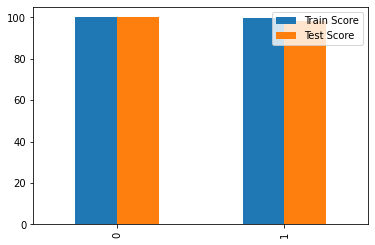

In [290]:
scores.plot.bar()

From above we can see that the linear regression give the best score and gave the model to predict ratings. As well as random forest also gave the best accurate score.